#Abstracto y Motivación

####El proyecto busca desarrollar un modelo predictivo que aproveche la relación entre los precios, volúmenes de venta, valor del dólar en pesos y el índice de Riesgo País para estimar los valores futuros de las acciones de las empresas argentinas. El objetivo final es proporcionar a los inversores y profesionales financieros una herramienta que les ayude a tomar decisiones más informadas y optimizar sus estrategias de inversión en el mercado de valores argentino

####El proyecto tiene como objetivo principal desarrollar un modelo predictivo para estimar los valores de las acciones de las empresas en Argentina. Se utilizarán variables clave como los precios y volúmenes de venta de las acciones, así como el valor del dólar en pesos y el índice de Riesgo País elaborado por el JP Morgan.
####Para llevar a cabo este análisis, se recopilarán datos históricos de los valores de las acciones de las empresas seleccionadas y se realizará un exhaustivo análisis exploratorio de los mismos tomando los datos desde la API de Yahoo Finance . Se utilizarán técnicas de limpieza y preprocesamiento de datos.
###Posteriormente, se aplicarán algoritmos de machine learning y técnicas estadísticas avanzadas para entrenar un modelo predictivo. Se explorarán diferentes enfoques, como regresión lineal, series temporales u otros modelos de aprendizaje automático, para determinar cuál ofrece la mejor precisión en la predicción de los valores de las acciones.
####Además, se realizará un análisis de la influencia del valor del dólar en pesos y el índice de Riesgo País en los valores de las acciones de las empresas argentinas. Se examinará si estas variables macroeconómicas tienen un impacto significativo en la variabilidad y tendencia de los precios de las acciones.
####Finalmente, se evaluará la precisión y desempeño del modelo predictivo utilizando métricas y técnicas de validación adecuadas.

#AUDIENCIA
#### El proyecto esta destinado a los inversores en el mercado argentino, desde grandes Empresas hasta pequeños Ahoritas los cual buscan conocer la incidencia de los DriverMacroeconomicos que le permita tomar desiciones en funcion de las variables macro economicas. Buscando concer como las variaciones de estas variables inciden en las acciones ya que en una economia volatil seguir a los indicadores de confienza econimica es clave por lo que el proyecto trabaja con el valor de la relacion Peso/Dolar y el Riesgo Pais generado por el JP Morgan






#Preguntas y Problema a resolver


####+ ¿Cómo influyen el valor del dólar en pesos y el índice de Riesgo País del JP Morgan en los valores de las acciones?
####+¿Hay una relación significativa entre estas variables macroeconómicas y el rendimiento de las acciones?
####¿Es posible predecir los valores futuros de las acciones de empresas argentinas utilizando modelos de machine learning y análisis estadístico?
####+¿Qué enfoques de modelado ofrecen la mejor precisión en la predicción?

####¿Cómo se comparan los diferentes modelos predictivos en términos de su capacidad para estimar los valores de las acciones?
####+¿Cuál es el modelo más efectivo y confiable para realizar predicciones en el contexto del mercado de valores argentino?

####¿Cuál es la utilidad práctica de este modelo predictivo en la toma de decisiones financieras e inversiones?



# Instalación de librerías

In [ ]:
import pandas as pd
from pandas_datareader import data
pd.options.display.max_rows =300

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go


import json
import requests

In [ ]:
#Conecto a google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
!pip install chart_studio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
import chart_studio.plotly as py

# Ingeniería de atributos

Importar datos de API Yahoo Finance

In [ ]:
empresas =  ['ARS=X',#Dolar /peso
             'spy', #SPDR S&P 500
             'NQ=F',# Nasdaq 100
             'MELI', # mercadolibre
             'GLOB', # Globan
             'DESP',# DESPEGAR
             'Tx', #Ternium
             'TS', #Tenaris
             'YPF',# compañia estatal de petrolio de Argentina
             'PAM',# Pampa Energía
             'TGS',# Transportadora de Gas del Sur
             'BMA',#Banco Macro S.A
             'LOMA',# Loma Negra
             'BIOX',#  Bioceres
             'CRESY',# Cresud
]
recolector = []
for nemo in empresas:
    # Creamos el objecto Ticker usando la empresa 'e'
    ticker = yf.Ticker(nemo)

    # Guardemos sus precios de cierre en una variable
    px = ticker.history(period="max")['Close']
    px.name = nemo  # Para indentificarla mas facil

    # Lo guardamos en nuestra lista 'recolector'
    recolector += [px]

# Concatenamos todas las Series individuales en un DataFrame
precios = pd.concat(recolector, axis=1)
precios.head

<bound method NDFrame.head of                                 ARS=X         spy     NQ=F         MELI  \
Date                                                                      
1993-01-29 05:00:00+00:00         NaN   25.029369      NaN          NaN   
1993-02-01 05:00:00+00:00         NaN   25.207382      NaN          NaN   
1993-02-02 05:00:00+00:00         NaN   25.260798      NaN          NaN   
1993-02-03 05:00:00+00:00         NaN   25.527807      NaN          NaN   
1993-02-04 05:00:00+00:00         NaN   25.634640      NaN          NaN   
...                               ...         ...      ...          ...   
2023-06-20 04:00:00+00:00         NaN  437.179993  15256.5  1197.739990   
2023-06-20 23:00:00+00:00  249.309296         NaN      NaN          NaN   
2023-06-21 04:00:00+00:00         NaN  434.940002  15044.0  1210.900024   
2023-06-21 23:00:00+00:00  252.570007         NaN      NaN          NaN   
2023-06-22 04:00:00+00:00         NaN  436.510010  15228.5  1241.51001

#Se descargo los valores de cierre de las siguientes acciones divididos en categorías, siempre siendo empresas argentinas y tomas de referencias del marcado internaciones los valores de S&P 500 (spy) y NASDAQ 100 ('NQ=F) valor del Dolar en pesos ARS=X

#Empresas tecnológicas :  + 'MELI', mercadolibre + 'GLOB', Globan SA + 'DESP', DESPEGAR
#Empresas exportadoras de productos industriales : + 'TS', Tenaris +  'Tx', Ternium
#Empresas de energia : + 'YPF', compañía estatal de petróleo de Argentina + 'PAM’, Pampa Energía + 'TGS', Transportadora de Gas del Sur
#Empresas Agro Exportadoras : +  'BIOX',  Bioceres +  'CRESY', Cresud
#Empresa bancaria : + 'BMA',Banco Macro S.A
#Empresa de La construcción: +   'LOMA', Loma Negra


In [ ]:
# Contando valores nulos en el dataset
sum(precios.isnull().sum())

124960

# La APi genera una gran cantidad de nulos ya que las empresas tiene distintas fechas de inicio de actividad y tienen distinas horas de cierre por lo que se generan varios registros por dia en los cuales las acciones cierran en un horario y la codicacion dolas/peso cierra en otro horario

In [ ]:
#Transformamos la Variable precios a un dataframe
preciosDF=pd.DataFrame(precios).reset_index()
preciosDF.head(3)

,Date,ARS=X,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
0,1993-01-29 05:00:00+00:00,NaN,25.029375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-02-01 05:00:00+00:00,NaN,25.207378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-02-02 05:00:00+00:00,NaN,25.260786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Analisamos las variables que contienen a los dataframe
preciosDF.dtypes

Date     datetime64[ns, UTC]
ARS=X                float64
spy                  float64
NQ=F                 float64
MELI                 float64
GLOB                 float64
DESP                 float64
Tx                   float64
TS                   float64
YPF                  float64
PAM                  float64
TGS                  float64
BMA                  float64
LOMA                 float64
BIOX                 float64
CRESY                float64
dtype: object

### Para unicar los dias tuvimos que hacer el siguiente procedimeto para elimiar los nulos sin perder informacion.
## el cual fue separa los datos segun su hora de cierre, elimiar las horas y dejar solo fecha y convinar las tablas

In [ ]:
#Cambio de formato en la columna Date, para pasarlos "dedatetime64[ns, UTC]"  a dedatetime64 Fechas dd-mm-yyyy
preciosDF['Date']= preciosDF['Date'].astype(str)
preciosDF['Fecha'] = preciosDF['Date'].str.slice(stop=10)
preciosDF[['año','mes','dia']]=preciosDF['Fecha'].str.split('-', expand=True)


In [ ]:
#Eleiminas Las columnas puentes que no usamos que se generaron en el cambio de formato de fechas
preciosDF=preciosDF.drop(['dia', 'año','mes','dia', 'Date'],axis=1)

In [ ]:
preciosDF.dtypes

ARS=X    float64
spy      float64
NQ=F     float64
MELI     float64
GLOB     float64
DESP     float64
Tx       float64
TS       float64
YPF      float64
PAM      float64
TGS      float64
BMA      float64
LOMA     float64
BIOX     float64
CRESY    float64
Fecha     object
dtype: object

In [ ]:
#Tomamos a la Columna Fecha como Indice
preciosDFf = preciosDF.set_index('Fecha')
preciosDFf.head(3)

,ARS=X,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
Fecha,,,,,,,,,,,,,,,
1993-01-29,NaN,25.029375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,NaN,25.207378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,NaN,25.260786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Contamos los nulos por columna
preciosDFf.isnull().sum()

ARS=X     7680
spy       5190
NQ=F      7092
MELI      8850
GLOB     10596
DESP     11396
Tx        8467
TS        7680
YPF       5294
PAM       9396
TGS       5646
BMA       8504
LOMA     11426
BIOX     11522
CRESY     6235
dtype: int64

In [ ]:
#Al tener diferente horario de Cierre los precios de las Acciones de los Dolares ya que uno responde a los horarios de NY y el dolar de Buenos Aires
# Por lo que se debe separar al precio del "dolar" en pesos de las acciones de bolza, ya que si no se realiza se borrarian todas las filas si se eliminan los nulos de forma general

dolarDFf= preciosDFf[['ARS=X']] #"dolarDFf" Variable de trabajo para la eliminacion de nulos y duplicados
dolarDFf= dolarDFf.dropna()
dolarDFf= dolarDFf.drop_duplicates()



In [ ]:
#La misma limpieza quenerada para los dolares la realizamos para los precions de los dolares la realizamos para el precio de las acciones

print("Registros iniciales: ", str(preciosDFf.shape))
#Eliminamos a la columna del Precio del DOLAR 'ARS=X' ya que esta es nula para los precios de cierre de las acciones
acciones= preciosDFf.drop(['ARS=X'],axis=1)
acciones= acciones.dropna()
acciones= acciones.drop_duplicates()
print("Registros después de eliminar duplicados y Nulos: ", str(acciones.shape))
acciones.head(3)

Registros iniciales:  (12842, 15)
Registros después de eliminar duplicados y Nulos:  (1320, 14)


,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
Fecha,,,,,,,,,,,,,,
2018-03-22,241.233551,6692.00,350.600006,51.790001,31.910000,24.553923,29.034115,20.974398,61.299999,16.822277,92.489014,18.951801,9.60,18.172085
2018-03-23,236.091766,6554.25,344.730011,50.689999,32.450001,24.430693,29.016775,20.599678,61.009998,16.450943,91.473412,19.015736,9.64,17.927620
2018-03-26,242.551010,6773.50,353.399994,52.299999,32.799999,24.777279,29.953079,21.615366,61.500000,17.064079,93.470184,19.171003,9.64,18.280739


In [ ]:
#transformamos a dolarDFf en un DF con la conlumna fecha como indice
#Cantidad egistros antes de la Limpieza
print("Registros iniciales: ", str(dolarDFf.shape))
dolar=dolarDFf
dolar=pd.DataFrame(dolar).reset_index()
dolar = dolar.set_index('Fecha')
print("Registros después de eliminar duplicados y Nulos: ", str(dolar.shape))
dolar.head()

Registros iniciales:  (4488, 1)
Registros después de eliminar duplicados y Nulos:  (4488, 1)


,ARS=X
Fecha,
2001-07-12,0.99940
2001-07-15,0.99875
2001-07-22,0.99870
2001-07-29,0.99825
2001-08-05,0.99865


In [ ]:
# Ahora unimos las tabla del precio y del dolar independiente de la hora de cierre en el DF bolsa
bolsa= dolar.merge(acciones, how='inner', left_index=True, right_index=True)
print("Registros Totales: ", str(bolsa.shape))
bolsa.head(7)

Registros Totales:  (1156, 15)


,ARS=X,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
Fecha,,,,,,,,,,,,,,,
2018-03-22,20.263000,241.233551,6692.00,350.600006,51.790001,31.910000,24.553923,29.034115,20.974398,61.299999,16.822277,92.489014,18.951801,9.60,18.172085
2018-03-23,20.215000,236.091766,6554.25,344.730011,50.689999,32.450001,24.430693,29.016775,20.599678,61.009998,16.450943,91.473412,19.015736,9.64,17.927620
2018-03-26,20.159500,242.551010,6773.50,353.399994,52.299999,32.799999,24.777279,29.953079,21.615366,61.500000,17.064079,93.470184,19.171003,9.64,18.280739
2018-03-27,20.151501,238.424789,6561.25,352.209991,51.630001,31.930000,24.523119,29.554281,21.211061,60.529999,17.400866,92.971001,19.582006,9.60,18.117760
2018-03-28,20.141001,237.720276,6477.25,341.220001,50.750000,31.000000,24.191933,29.094801,21.112452,59.880001,17.409502,92.041466,19.508940,9.60,18.371283
2018-03-29,20.127001,240.757828,6594.00,356.390015,51.540001,31.250000,25.023748,30.057110,21.319534,59.599998,17.564945,92.927963,19.472406,9.58,18.244522
2018-04-02,20.128000,235.561096,6393.25,347.200012,49.939999,30.600000,25.093063,29.614967,20.994122,58.869999,17.245424,93.461586,19.545473,9.62,18.470881


# Ahora volvemos a unir las tabla del precio del dolar en peso y el valor de las acciones independiente de la hora de cierre


In [ ]:
#Analisis de estadisticos de la bolsa
bolsa.describe(include='all')

,ARS=X,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,89.293362,339.970023,10832.918192,922.718833,156.693988,11.755956,26.951407,22.584544,8.809189,23.276540,8.366959,25.986445,6.860042,9.549652,6.783593
std,51.522780,70.236866,2993.163655,456.982184,74.803431,4.967240,9.441279,6.684580,4.939998,10.841454,3.791717,17.784994,2.876199,3.379883,3.654409
min,20.118999,212.184494,5892.000000,257.519989,43.939999,4.590000,8.166176,8.385823,2.570000,9.020000,3.840000,9.728044,2.931821,4.100000,2.163990
25%,45.160099,269.883308,7698.687500,542.610016,91.557501,7.800000,18.768097,18.980265,4.390000,14.287500,5.170000,13.883577,5.279104,5.900000,4.500014
50%,79.989700,343.217911,11340.250000,883.354980,165.790001,11.645000,26.260221,21.934297,7.300000,20.570000,6.610000,17.611070,5.986943,9.735000,5.482411
75%,107.290108,404.180046,13231.812500,1249.767487,212.750000,13.810000,35.045235,27.789165,12.974628,31.582500,11.882500,33.991962,7.324275,12.635000,8.692180
max,249.309998,466.563354,16575.000000,1984.339966,354.440002,32.799999,49.198742,35.740604,22.700079,61.500000,18.203985,94.666550,20.084343,16.000000,19.657000


##El EMBI (Emerging Markets Bonds Index o Indicador de Bonos de Mercados Emergentes) es el principal indicador de riesgo país y está calculado por JP Morgan Chase.1​ Es la diferencia de tasa de interés que pagan los bonos denominados en dólares, emitidos por países subdesarrollados, y los Bonos del Tesoro de Estados Unidos, que se consideran "libres" de riesgo.

##Este diferencial (también denominado spread o swap) se expresa en puntos básicos (pb). Una medida de 100 pb significa que el gobierno en cuestión estaría pagando un punto porcentual (1%) por encima del rendimiento de los bonos libres de riesgo, los Treasury Bills. Los bonos más riesgosos pagan un interés más alto, por lo tanto el spread de estos bonos respecto a los bonos del Tesoro de Estados Unidos es mayor. Esto implica que el mayor rendimiento que tiene un bono riesgoso es la compensación por existir una probabilidad de incumplimiento.

In [ ]:
# Valor del riesgo pais Argentina
# RPA = pd.read_csv('/content/drive/MyDrive/00 DataScience Abdelhamid/07 SegundaEntrega+Abdelhamid/RIESGO PAIS - Cotizaciones historicas.csv')
RPA = pd.read_csv('RIESGO PAIS - Cotizaciones historicas.csv')
RPA.head(3)

,especie,ultimo,variacion,anterior,apertura,minimo,maximo,varMTD,varYTD,var6M,var12M,fecha,hora,cierre,timestamp,volumen
0,RIESGO PAIS,937,NaN,NaN,937,937,937,NaN,NaN,NaN,NaN,1999-01-22,NaN,937,916974000,0
1,RIESGO PAIS,790,NaN,NaN,790,790,790,NaN,NaN,NaN,NaN,1999-02-01,NaN,790,917838000,0
2,RIESGO PAIS,769,NaN,NaN,769,769,769,NaN,NaN,NaN,NaN,1999-02-02,NaN,769,917924400,0


In [ ]:
#Analisis de estadisticos de la Riesgo Pais Argentina
RPA.describe(include='all')

,especie,ultimo,variacion,anterior,apertura,minimo,maximo,varMTD,varYTD,var6M,var12M,fecha,hora,cierre,timestamp,volumen
count,6641,6641.000000,1594.000000,1594.000000,6641.00000,6641.000000,6641.000000,0.0,0.0,0.0,0.0,6641,1594,6641.000000,6.641000e+03,6641.0
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6641,14,NaN,NaN,NaN
top,RIESGO PAIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-01-22,19:58,NaN,NaN,NaN
freq,6641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1576,NaN,NaN,NaN
mean,NaN,1633.673393,0.117584,1807.222710,1633.52206,1630.530191,1636.343171,NaN,NaN,NaN,NaN,NaN,NaN,1633.673393,1.320862e+09,0.0
std,NaN,1683.149935,3.039853,702.163268,1683.16356,1682.051868,1684.858960,NaN,NaN,NaN,NaN,NaN,NaN,1683.149935,2.284330e+08,0.0
min,NaN,185.000000,-48.600000,0.000000,185.00000,185.000000,178.000000,NaN,NaN,NaN,NaN,NaN,NaN,185.000000,9.169740e+08,0.0
25%,NaN,571.000000,-0.400000,1448.000000,571.00000,571.000000,570.000000,NaN,NaN,NaN,NaN,NaN,NaN,571.000000,1.120532e+09,0.0
50%,NaN,850.000000,0.000000,1772.000000,849.00000,848.000000,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,850.000000,1.327374e+09,0.0
75%,NaN,1874.000000,0.600000,2220.750000,1873.00000,1864.000000,1880.000000,NaN,NaN,NaN,NaN,NaN,NaN,1874.000000,1.536116e+09,0.0


In [ ]:
# Transformamos el RPA en un DF , reiniciamos el indice y nos quedamos con los valores de cierre para el trabajo
RPA1= pd.DataFrame(RPA).reset_index() # variable de trabajo
RPA2= RPA1.rename(columns={'fecha':'Fecha', 'cierre':'RPA' }) # variable de trabajo
RpaDF=RPA2[['Fecha','RPA']]
RpaDF.head() #Valores de cierre del Riesgo Pais Argentina por fecha

,Fecha,RPA
0,1999-01-22,937
1,1999-02-01,790
2,1999-02-02,769
3,1999-02-03,772
4,1999-02-04,777


In [ ]:
RPArg=RpaDF
RPArg=pd.DataFrame(RPArg).reset_index()
RPArg = RPArg.set_index('Fecha')
RPArg = RPArg [['RPA']]
RPArg.head()


,RPA
Fecha,
1999-01-22,937
1999-02-01,790
1999-02-02,769
1999-02-03,772
1999-02-04,777


In [ ]:
#Analisis de las Variables del DF
RpaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   6641 non-null   object
 1   RPA     6641 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 103.9+ KB


In [ ]:
# A continuacion trabajamos conluna fechas para transformarla en Datatime
RpaDF['Fecha']= RpaDF['Fecha'].astype(str)
RpaDF['Fecha'] = RpaDF['Fecha'].str.slice(stop=10)
RpaDF[['año','mes','dia']]=RpaDF['Fecha'].str.split('-', expand=True)
RpaDFf=RpaDF.drop(['dia', 'año','mes','dia', 'Fecha'],axis=1)
RpaDFf['Fecha']=pd.to_datetime({'year': RpaDF['año'], 'month': RpaDF['mes'], 'day':  RpaDF['dia'] })
RpaDFf.dtypes

<ipython-input-28-e46f69ef3189>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RpaDF['Fecha']= RpaDF['Fecha'].astype(str)
<ipython-input-28-e46f69ef3189>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RpaDF['Fecha'] = RpaDF['Fecha'].str.slice(stop=10)
<ipython-input-28-e46f69ef3189>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

RPA               int64
Fecha    datetime64[ns]
dtype: object

In [ ]:
RpaDFf.head(3)

,RPA,Fecha
0,937,1999-01-22
1,790,1999-02-01
2,769,1999-02-02


In [ ]:
RPArg.dtypes

RPA    int64
dtype: object

In [ ]:
# Ahora unimos las tabla del precio de cieere de las accione sy del dolar con el Riesgo Pais de argentina RPArgDFf

DFestudio=RPArg.merge(bolsa, how='inner', left_index=True, right_index=True)

DFestudio.head(3)


,RPA,ARS=X,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
Fecha,,,,,,,,,,,,,,,,
2018-03-22,419,20.2630,241.233551,6692.00,350.600006,51.790001,31.910000,24.553923,29.034115,20.974398,61.299999,16.822277,92.489014,18.951801,9.60,18.172085
2018-03-23,425,20.2150,236.091766,6554.25,344.730011,50.689999,32.450001,24.430693,29.016775,20.599678,61.009998,16.450943,91.473412,19.015736,9.64,17.927620
2018-03-26,418,20.1595,242.551010,6773.50,353.399994,52.299999,32.799999,24.777279,29.953079,21.615366,61.500000,17.064079,93.470184,19.171003,9.64,18.280739


In [ ]:
#Instalamaos la Biblioteca de Graficos para SERIES TEMPORALES
import plotly.io as io
#io.templates.default = 'plotly_dark'
import plotly.graph_objects as go
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px

# Variacion del precio del dolar desde el año 2000

In [ ]:
fig = px.line(dolar,
        x =  dolar.index,
        y= ['ARS=X'],
        title='Valor del Dolar en Pesos')

fig.add_vrect(x0="2019-08-11", x1="2019-10-27",
              annotation_text="PASO 11/08 al Elecciones Gral. 20/10  y COVID 19", annotation_position="top left",
              annotation=dict(font_size=15, font_family="Times New Roman"),
              fillcolor="green", opacity=0.25, line_width=0)

fig.add_vrect(x0="2020-01-01", x1="2022-01-01",
             # annotation_text="Covid 19", annotation_position="top left",
            #  annotation=dict(font_size=10, font_family="Times New Roman"),
              fillcolor="red", opacity=0.25, line_width=0)


fig.show(config=dict(displayModeBar=True))

#fig, ax = plt.subplots(figsize=(15,8) )

#colors = [  '#00ff41']
#dolar.plot(ax=ax, color=colors)


In [ ]:
fig = px.line(RPArg,
        x =  RPArg.index,
        y= ['RPA'],
        title='Riesgo Pais de Argentina')

fig.add_vrect(x0="2019-08-11", x1="2019-10-27",
              annotation_text="PASO 11/08 al Elecciones Gral. 20/10  y COVID 19", annotation_position="top left",
              annotation=dict(font_size=15, font_family="Times New Roman"),
              fillcolor="green", opacity=0.25, line_width=0)

fig.add_vrect(x0="2020-01-01", x1="2022-01-01",
             # annotation_text="Covid 19", annotation_position="top left",
            #  annotation=dict(font_size=10, font_family="Times New Roman"),
              fillcolor="red", opacity=0.25, line_width=0)


fig.show(config=dict(displayModeBar=True))

#fig, ax = plt.subplots(figsize=(15,8) )

#colors = [  '#00ff41']
#dolar.plot(ax=ax, color=colors)


In [ ]:
DolarRPA= RPArg.merge(dolar, how='inner', left_index=True, right_index=True)
DolarRPA=DolarRPA.loc['2019-03-01': '2019-12-01']
DolarRPA=DolarRPA.div(DolarRPA.iloc[0])
DolarRPA.head(7)

,RPA,ARS=X
Fecha,,
2019-03-01,1.000000,1.000000
2019-03-04,1.018081,1.017842
2019-03-05,1.038943,1.017880
2019-03-06,1.043115,1.018097
2019-03-07,1.089013,1.040803
2019-03-08,1.066759,1.084530
2019-03-11,1.031989,1.053448


In [ ]:
fig = px.line(DolarRPA,
        x =  DolarRPA.index,
        y= ['RPA','ARS=X'],
        title='Riesgo Pais de Argentina vs Precio del Dolar')

fig.add_vrect(x0="2019-08-11", x1="2019-10-27",
              annotation_text="PASO 11/08 al Elecciones Gral. 20/10  y COVID 19", annotation_position="top left",
              annotation=dict(font_size=15, font_family="Times New Roman"),
              fillcolor="green", opacity=0.25, line_width=0)

#fig.add_vrect(x0="2020-01-01", x1="2022-01-01",
             # annotation_text="Covid 19", annotation_position="top left",
            #  annotation=dict(font_size=10, font_family="Times New Roman"),
            #  fillcolor="red", opacity=0.25, line_width=0)


fig.show(config=dict(displayModeBar=True))

#fig, ax = plt.subplots(figsize=(15,8) )

#colors = [  '#00ff41']
#dolar.plot(ax=ax, color=colors

# Periodo de Analisis '2019-01-09': '2020-03-01'

In [ ]:
# Periodo de Analisis '2019-01-09': '2020-03-01'

DFestudio2019=DFestudio.loc['2019-01-09': '2020-03-01']
DFestudio2019.head()

,RPA,ARS=X,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
Fecha,,,,,,,,,,,,,,,,
2019-01-09,714,37.536999,239.542313,6604.75,339.959991,60.830002,13.61,23.075068,21.163588,14.310240,36.959999,14.302170,44.799938,11.608549,10.090,11.725387
2019-01-10,706,37.356998,240.387329,6625.25,339.589996,61.060001,13.58,22.782278,21.243450,14.349935,35.799999,14.302170,46.376842,11.836884,10.070,11.671061
2019-01-11,704,37.355999,240.480179,6612.75,344.950012,60.250000,13.90,22.655663,21.065975,14.568260,36.400002,14.493229,47.103275,11.645082,10.070,11.788768
2019-01-14,698,36.929001,239.013031,6545.00,339.769989,61.400002,13.89,22.347046,20.861885,14.498793,35.790001,14.529621,46.952675,11.508082,10.050,11.924582
2019-01-15,696,36.976002,241.752304,6676.75,350.100006,63.540001,13.81,22.030516,20.666666,14.399554,36.009998,14.675189,46.731197,11.553749,10.058,11.997018


<Axes: >

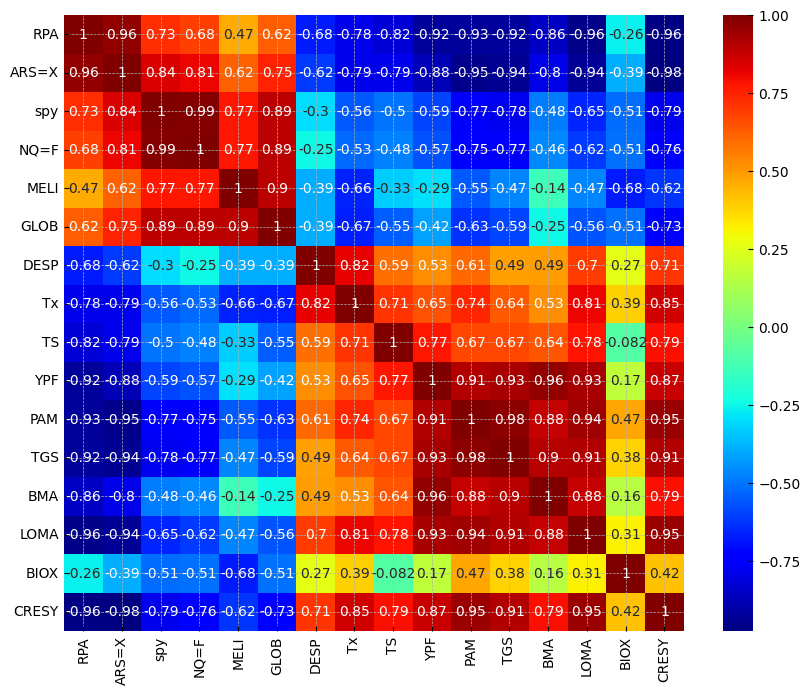

In [ ]:
# Matriz de Correlaccion entre las valores de estudio

plt.figure(figsize= (10,8))
#mask = np.triu(np.ones_like(precios6.corr(),dtype = bool))
# sns.heatmap(precios6.corr(), cmap='jet' ,mask = mask, fmt = ".2f",annot=True,lw=1)
sns.heatmap(DFestudio2019.corr(), cmap='jet' ,annot=True)

#como se aprecia tanto en el grafico con el la matriz de correlación las únicas acciones que siguen la devaluación son las de las empresas tecnológicas como Mercado Libre y Globant


In [ ]:
#Usamos la Biblioteca de normalizado
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
#hacemos una Copia del DF para Normalizarlo
DFestudio2019n = DFestudio2019

#a continuacion normalizaremos los precios y el valor del dolar para visibizar los precios sin el problema de la escala del valor de la acciones

In [ ]:
# Normalizamos los valores para poder trabajar y visualizar independiente de la escala del valor de la accion
DFestudio2019norm=DFestudio2019n
DFestudio2019norm[['RPA', 'ARS=X', 'spy' , 'NQ=F', 'MELI', 'GLOB','DESP', 'Tx', 'TS', 'YPF','PAM','TGS', 'BMA', 'LOMA', 'BIOX', 'CRESY']] = scaler.fit_transform (DFestudio2019n[['RPA','ARS=X','spy' , 'NQ=F', 'MELI', 'GLOB','DESP', 'Tx', 'TS', 'YPF','PAM','TGS','BMA', 'LOMA', 'BIOX', 'CRESY']])
DFestudio2019norm.head()

<ipython-input-38-5a9cb97bf4c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFestudio2019norm[['RPA', 'ARS=X', 'spy' , 'NQ=F', 'MELI', 'GLOB','DESP', 'Tx', 'TS', 'YPF','PAM','TGS', 'BMA', 'LOMA', 'BIOX', 'CRESY']] = scaler.fit_transform (DFestudio2019n[['RPA','ARS=X','spy' , 'NQ=F', 'MELI', 'GLOB','DESP', 'Tx', 'TS', 'YPF','PAM','TGS','BMA', 'LOMA', 'BIOX', 'CRESY']])


,RPA,ARS=X,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
Fecha,,,,,,,,,,,,,,,,
2019-01-09,0.042677,0.024184,0.006526,0.018739,0.026772,0.007778,0.441781,0.818469,0.445459,0.604229,0.940449,0.807362,0.499583,0.969807,1.000000,0.899492
2019-01-10,0.038462,0.017024,0.016944,0.025169,0.025878,0.010862,0.438356,0.793501,0.453282,0.608024,0.897004,0.807362,0.531809,1.000000,0.996661,0.893401
2019-01-11,0.037408,0.016985,0.018089,0.021248,0.038830,0.000000,0.474886,0.782703,0.435898,0.628897,0.919476,0.824906,0.546654,0.974638,0.996661,0.906599
2019-01-14,0.034247,0.000000,0.000000,0.000000,0.026313,0.015422,0.473744,0.756385,0.415907,0.622255,0.896629,0.828248,0.543577,0.956522,0.993322,0.921827
2019-01-15,0.033193,0.001870,0.033773,0.041320,0.051273,0.044120,0.464612,0.729391,0.396785,0.612768,0.904869,0.841615,0.539051,0.962560,0.994658,0.929949


In [ ]:
#'El Mercado ARG. en NYQ frente a la devaluacion del peso 2019 Normalizado'

fig = px.line(DFestudio2019norm,
    #    x = ['Fechas'] ,
     #   y= ['RPA', 'Dolar/Peso' ,'SPDR S&P 500' , 'Nasdaq 100' , 'mercadolibre' , 'Globan' , 'DESPEGAR' , 'Ternium', 'Tenaris' , 'YPF' , 'Pampa Energía','Transportadora de Gas del Sur', 'Banco Macro', 'Loma Negra', ' Bioceres'  ,'Cresud '],
        title='El Mercado ARG. en NYQ frente a la devaluacion del peso 2019 Normalizado',
        color_discrete_map= {'Dolar/Peso' : '#00ff41' })

fig.update_traces(patch={"line":{"color":"red", "width":5}}, selector={"legendgroup":"ARS=X"})
#fig.update_traces(patch={"line":{"color":"red", "width":6 , "dash": 'dot'}}, selector={"legendgroup":"Dolar/Peso"})
fig.update_traces(patch={"line":{"color":"blue", "width":5}}, selector={"legendgroup":"RPA"})
#fig.update_traces(patch={"line":{"color":"red", "width":6 , "dash": 'dot'}}, selector={"legendgroup":"Dolar/Peso"})

fig.add_vrect(x0="2019-08-11", x1="2019-10-27",
              annotation_text="PASO 11/08 \n Elecciones Gral. 20/10", annotation_position="top left",
              annotation=dict(font_size=20, font_family="Times New Roman"),
              fillcolor="red", opacity=0.25, line_width=0)

fig.update_layout(
    autosize=True,
    width=2300,
    height=800,)

fig.show(config=dict(displayModeBar=True))


In [ ]:
#Como se puede apreciar en la imagen anterior no se puede sacar mucha informacion con el DF Normalizado por lo que lo INDEXAREMOS a la fechas de interes
#de comienzo de año y de eleeciones
DFestudio2019=DFestudio.loc['2019-01-09': '2020-03-01']
DFestudio2019.head(3)

,RPA,ARS=X,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
Fecha,,,,,,,,,,,,,,,,
2019-01-09,714,37.536999,239.542313,6604.75,339.959991,60.830002,13.61,23.075068,21.163588,14.310240,36.959999,14.302170,44.799938,11.608549,10.09,11.725387
2019-01-10,706,37.356998,240.387329,6625.25,339.589996,61.060001,13.58,22.782278,21.243450,14.349935,35.799999,14.302170,46.376842,11.836884,10.07,11.671061
2019-01-11,704,37.355999,240.480179,6612.75,344.950012,60.250000,13.90,22.655663,21.065975,14.568260,36.400002,14.493229,47.103275,11.645082,10.07,11.788768


In [ ]:
#Pasamos a la fecha como indice del DF
preciosIndex=pd.DataFrame(DFestudio2019).reset_index()
preciosIndex = preciosIndex.set_index('Fecha')
preciosIndex=preciosIndex.div(preciosIndex.iloc[0]) #Dividimos a las columnas en el primer precio de interes del 2019 paraindezarlo
preciosIndex.head()

,RPA,ARS=X,spy,NQ=F,MELI,GLOB,DESP,Tx,TS,YPF,PAM,TGS,BMA,LOMA,BIOX,CRESY
Fecha,,,,,,,,,,,,,,,,
2019-01-09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-10,0.988796,0.995205,1.003528,1.003104,0.998912,1.003781,0.997796,0.987311,1.003774,1.002774,0.968615,1.000000,1.035199,1.019670,0.998018,0.995367
2019-01-11,0.985994,0.995178,1.003915,1.001211,1.014678,0.990465,1.021308,0.981824,0.995388,1.018030,0.984849,1.013359,1.051414,1.003147,0.998018,1.005405
2019-01-14,0.977591,0.983803,0.997790,0.990953,0.999441,1.009370,1.020573,0.968450,0.985744,1.013176,0.968344,1.015903,1.048052,0.991345,0.996036,1.016988
2019-01-15,0.974790,0.985055,1.009226,1.010901,1.029827,1.044550,1.014695,0.954732,0.976520,1.006241,0.974297,1.026081,1.043109,0.995279,0.996828,1.023166


# Para concluir el analisis  mostraremos la variacios de las acciones y del dolar indexsado desde el comienzo de año a 1

<Axes: xlabel='Fecha'>

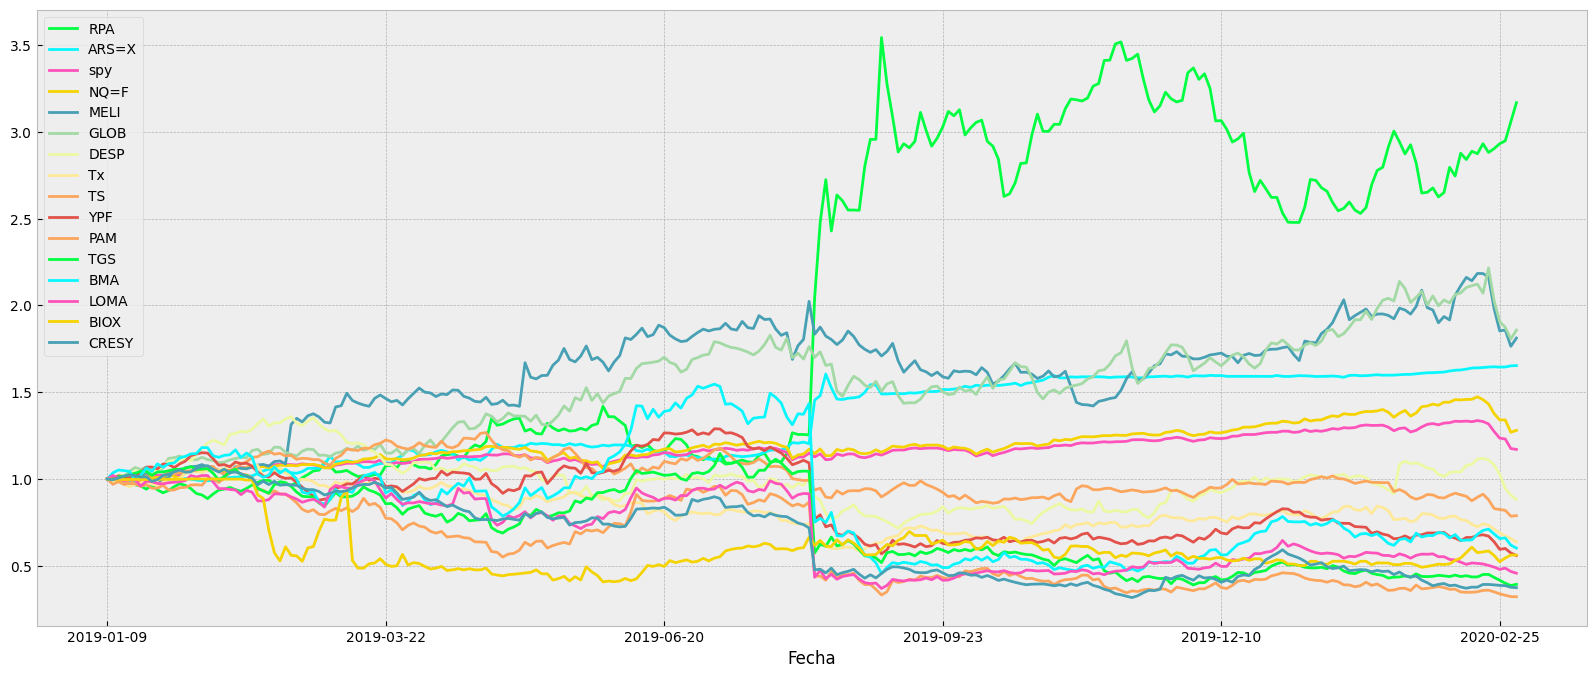

In [ ]:
fig, ax = plt.subplots(figsize=(20,8) )

colors = [
  '#00ff41', # matrix green
     '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow

    '#47a0b3', '#a2d9a4', '#edf8a3', '#fee999', '#fca55d', '#e2514a' ,'#fca55d'
]
preciosIndex.plot(ax=ax, color=colors)

In [ ]:
#Nombre de las Columnas de DF
preciosIndex.columns

Index(['SPDR S&P 500', 'Nasdaq 100', 'mercadolibre', 'Globant', 'DESPEGAR',
       'Ternium', 'Tenaris', 'YPF', 'Pampa Energía',
       'Transportadora de Gas del Sur', 'Banco Macro', 'Loma Negra',
       ' Bioceres', 'Cresud ', 'Dolar/Peso', 'RPA'],
      dtype='object')

In [ ]:
# Renombre de las Columnas de DF para su analisis con los nombres mas conocidos
preciosIndex.columns =   ['RPA','Dolar/Peso','SPDR S&P 500' , 'Nasdaq 100' , 'mercadolibre' , 'Globant' , 'DESPEGAR' , 'Ternium', 'Tenaris' , 'YPF' , 'Pampa Energía','Transportadora de Gas del Sur', 'Banco Macro', 'Loma Negra', ' Bioceres' ,'Cresud ']

In [ ]:
fig = px.line(preciosIndex,
        x = preciosIndex.index ,
        y= ['RPA', 'Dolar/Peso' ,'SPDR S&P 500' , 'Nasdaq 100' , 'mercadolibre' , 'Globant' , 'DESPEGAR' , 'Ternium', 'Tenaris' , 'YPF' , 'Pampa Energía','Transportadora de Gas del Sur', 'Banco Macro', 'Loma Negra', ' Bioceres'  ,'Cresud '],
        title='El Mercado ARG. en NYQ frente a la devaluacion del peso 2019 INDEXADO 01-01-2019',
        color_discrete_map= {'Dolar/Peso' : '#00ff41' })

fig.update_traces(patch={"line":{"color":"red", "width":5}}, selector={"legendgroup":"Dolar/Peso"})
#fig.update_traces(patch={"line":{"color":"red", "width":6 , "dash": 'dot'}}, selector={"legendgroup":"Dolar/Peso"})
fig.update_traces(patch={"line":{"color":"blue", "width":5}}, selector={"legendgroup":"RPA"})
#fig.update_traces(patch={"line":{"color":"red", "width":6 , "dash": 'dot'}}, selector={"legendgroup":"Dolar/Peso"})

fig.add_vrect(x0="2019-08-11", x1="2019-10-27",
              annotation_text="PASO 11/08 \n Elecciones Gral. 20/10", annotation_position="top left",
              annotation=dict(font_size=20, font_family="Times New Roman"),
              fillcolor="red", opacity=0.25, line_width=0)

fig.update_layout(
    autosize=True,
    width=1500,
    height=600,)

fig.show(config=dict(displayModeBar=True))



In [ ]:
fig = px.line(preciosIndex,
        x = preciosIndex.index ,
        y= ['RPA','Dolar/Peso'  , 'Nasdaq 100' , 'mercadolibre'  , 'DESPEGAR' , 'Ternium', 'Tenaris' , 'YPF' , 'Pampa Energía','Transportadora de Gas del Sur', 'Banco Macro', 'Loma Negra', ' Bioceres'  ,'Cresud '],
        title='El Mercado ARG. en NYQ frente a la devaluacion del peso 2019 INDEXADO 01-01-2019',
        color_discrete_map= {'Dolar/Peso' : '#00ff41' })

fig.update_traces(patch={"line":{"color":"red", "width":5}}, selector={"legendgroup":"Dolar/Peso"})
#fig.update_traces(patch={"line":{"color":"red", "width":6 , "dash": 'dot'}}, selector={"legendgroup":"Dolar/Peso"})
fig.update_traces(patch={"line":{"color":"blue", "width":5}}, selector={"legendgroup":"RPA"})

fig.add_vrect(x0="2019-08-11", x1="2019-10-27",
              annotation_text="PASO 11/08 \n Elecciones Gral. 20/10", annotation_position="top left",
              annotation=dict(font_size=20, font_family="Times New Roman"),
              fillcolor="red", opacity=0.25, line_width=0)



fig.show(config=dict(displayModeBar=True))



# del analisis comcluimos que seria conveniete tener el dinero liquido y esperar que las acciones bajen su valor y comprarlas a bajo precio para tener una gran rentabilidad con el rebote



In [ ]:
# Ahora indexaremos los precios al dia de las eleccion ya que queremos analizar su tendencia una vez que se produjo su caida previo a las elecciones
# con el fin de determinar el rebote de los valores
preciosIndexElecciones=preciosIndex.loc['2019-08-11': '2020-04-01']
preciosIndexElecciones=preciosIndexElecciones.div(preciosIndexElecciones.iloc[0])
preciosIndexElecciones.head()

,RPA,Dolar/Peso,SPDR S&P 500,Nasdaq 100,mercadolibre,Globant,DESPEGAR,Ternium,Tenaris,YPF,Pampa Energía,Transportadora de Gas del Sur,Banco Macro,Loma Negra,Bioceres,Cresud
Fecha,,,,,,,,,,,,,,,,
2019-08-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-08-13,1.213014,1.018157,1.015551,1.023953,1.022320,1.018848,0.976649,1.052016,1.010512,1.031818,1.002466,1.087805,1.029834,1.090909,1.045016,1.008117
2019-08-14,1.332877,1.103703,0.985524,0.989692,0.994147,0.972646,0.893077,0.992986,0.956124,0.941818,0.948212,1.067073,0.996685,0.981818,0.993569,0.962662
2019-08-15,1.188356,1.048847,0.988128,0.990683,0.983324,0.977286,0.859484,0.973699,0.951554,0.956364,1.064118,1.159756,1.075138,1.040000,0.990354,1.021104
2019-08-19,1.289726,1.004636,1.014788,1.021244,0.967450,0.885753,0.868497,0.971362,0.995430,0.889091,0.990752,1.070732,0.896133,0.974545,1.053055,0.941559


In [ ]:
fig = px.line(preciosIndexElecciones,
        x = preciosIndexElecciones.index ,
        y= ['RPA','Dolar/Peso' ,'SPDR S&P 500' , 'Nasdaq 100' , 'mercadolibre' , 'Globant' , 'DESPEGAR' , 'Ternium', 'Tenaris' , 'YPF' , 'Pampa Energía','Transportadora de Gas del Sur', ' Bioceres' ,'Cresud '],
        title='El Mercado ARG. en NYQ frente a la devaluacion del peso 2019 INDEXADO 11-08-2019',
        color_discrete_map= {'Dolar/Peso' : '#00ff41' })

fig.update_traces(patch={"line":{"color":"red", "width":5}}, selector={"legendgroup":"Dolar/Peso"})
fig.update_traces(patch={"line":{"color":"blue", "width":5}}, selector={"legendgroup":"RPA"})


fig.add_vrect(x0="2019-08-11", x1="2019-10-27",
              annotation_text="PASO - Elecciones Gral", annotation_position="top left",
              annotation=dict(font_size=20, font_family="Times New Roman"),
              fillcolor="red", opacity=0.25, line_width=0)

fig.show(config=dict(displayModeBar=True))

Insights Dólar/ Peso en Año Electoral :
Se aprecia un Aumento del Dólar  de 40 a 60 previo a las elecciones por lo que la fecha de la devaluación es anterior a las elecciones de carácter especulativo

Insights Acciones Argentinas en el año Electoral :
La mayorías de las acciones de las empresas argentina independiente mente del sector (bancario, construcción , industriales , agrícolas) sufren una caída salvo las empresas tecnológicas como Glovant o mercadolibre las cual tiene su mercado fuera de Argentina

Insights Acciones Argentinas  Pos elecciones:
Luego de las elecciones y devaluación se puede apreciar como las empresas como Ternium crece a diferencias de las demás acciones argentianas por lo que es posible que una empresa de Producción  argentina se favorezca de la devaluación aunque la mayoría no supero la indexación de 1 luego del proceso electoral hasta la crisis del Covid 19 en Marzo 2020

Recomendaciones:
La devalucion no tiene se da antes de las elecciones y sin aviso
La Mayoría de las  Acciones de las empresas argentina tiene a la baja pos devaluaciones
El mercado mundial y las empresas argentinas cuyo núcleo de negocios esta afuera de la argentina no se ve afectado por la devaluación


In [ ]:
preciosIndexElecciones.head()

,RPA,Dolar/Peso,SPDR S&P 500,Nasdaq 100,mercadolibre,Globant,DESPEGAR,Ternium,Tenaris,YPF,Pampa Energía,Transportadora de Gas del Sur,Banco Macro,Loma Negra,Bioceres,Cresud
Fecha,,,,,,,,,,,,,,,,
2019-08-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-08-13,1.213014,1.018157,1.015551,1.023953,1.022320,1.018848,0.976649,1.052016,1.010512,1.031818,1.002466,1.087805,1.029834,1.090909,1.045016,1.008117
2019-08-14,1.332877,1.103703,0.985524,0.989692,0.994147,0.972646,0.893077,0.992986,0.956124,0.941818,0.948212,1.067073,0.996685,0.981818,0.993569,0.962662
2019-08-15,1.188356,1.048847,0.988128,0.990683,0.983324,0.977286,0.859484,0.973699,0.951554,0.956364,1.064118,1.159756,1.075138,1.040000,0.990354,1.021104
2019-08-19,1.289726,1.004636,1.014788,1.021244,0.967450,0.885753,0.868497,0.971362,0.995430,0.889091,0.990752,1.070732,0.896133,0.974545,1.053055,0.941559


# Modelos

## Random Forest Regressor con PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df_train = preciosIndexElecciones[['Dolar/Peso' ,'SPDR S&P 500' , 'Nasdaq 100' , 'mercadolibre' , 'Globant' , 'DESPEGAR' , 'Ternium', 'Tenaris' , 'YPF' , 'Pampa Energía','Transportadora de Gas del Sur', ' Bioceres' ,'Cresud ']]

target = preciosIndexElecciones['RPA']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2)

In [ ]:
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

rf_model = RandomForestRegressor()

for g in ParameterGrid(grid):
    rf_model.set_params(**g)
    rf_model.fit(X_train, y_train)
    test_scores.append(rf_model.score(X_test, y_test))

best_index = np.argmax(test_scores)
print(test_scores[best_index], ParameterGrid(grid)[best_index])

0.5780775871855892 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [ ]:
pca = PCA()

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_ # varianza explicada por cada componente principal
explained_variance

array([5.57787503e-01, 2.34484068e-01, 9.92470726e-02, 4.07829745e-02,
       2.26645683e-02, 1.41109214e-02, 1.02818418e-02, 8.62389314e-03,
       4.76093744e-03, 3.12215225e-03, 2.90263679e-03, 1.09102320e-03,
       1.40407620e-04])

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=8, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=3, max_features=8, n_estimators=200,
                      random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
#accuracy = accuracy_score(y_test, y_pred)
#print('El accuracy del modelo es:', accuracy)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1732738429760997
Mean Squared Error: 0.04635979869643682
Root Mean Squared Error: 0.2153132571311781


In [ ]:
pca_pipe = make_pipeline(StandardScaler(), PCA()) # estandariza, aplica PCA y lo mete en la tubería make_pipeline
pca_pipe.fit(preciosIndexElecciones)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:
modelo_pca = pca_pipe.named_steps['pca'] # Se extrae el modelo entrenado del pipeline

In [ ]:
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por cada componente
[5.25032814e-01 2.34502618e-01 1.03277505e-01 4.27972133e-02
 2.83362871e-02 1.86078270e-02 1.11217695e-02 9.04452838e-03
 6.80659718e-03 6.53861109e-03 3.90171094e-03 3.13608375e-03
 2.91357167e-03 2.53147603e-03 1.29131094e-03 1.60075811e-04]


In [ ]:
modelo_pca.explained_variance_ratio_.cumsum()

array([0.52503281, 0.75953543, 0.86281294, 0.90561015, 0.93394644,
       0.95255426, 0.96367603, 0.97272056, 0.97952716, 0.98606577,
       0.98996748, 0.99310357, 0.99601714, 0.99854861, 0.99983992,
       1.        ])

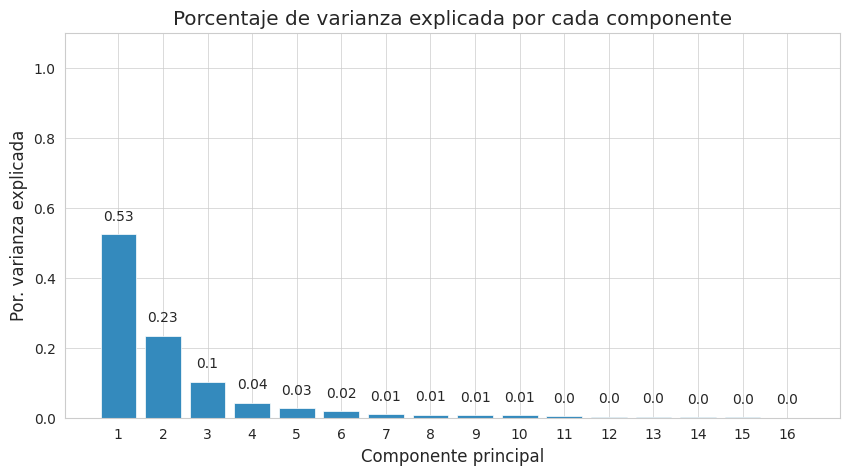

In [ ]:
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_) # varianza que aporta cada componente
for x, y in zip(np.arange(len(preciosIndexElecciones.columns)) + 1, modelo_pca.explained_variance_ratio_):
   label = round(y, 2)
   ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center') # pone los valores sobre las columnas del gráfico

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

## Regresión lineal múltiple

In [ ]:
df_train = preciosIndexElecciones[['Dolar/Peso' ,'RPA', 'SPDR S&P 500']]
target = preciosIndexElecciones['Globant']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split # Creación del modelo

In [ ]:
# Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realización de predicciones
y_pred = regressor.predict(X_test)
y_pred

array([1.12170639, 0.96346834, 0.91754329, 0.89139399, 1.10587219,
       1.05881193, 0.98703009, 0.9531522 , 1.12901095, 0.91365326,
       0.94298608, 0.95509651, 0.97658597, 0.87207546, 0.88126311,
       1.16676322, 0.90106395, 0.99751744, 1.08657177, 1.04670009,
       1.10408939, 1.08651303, 1.0973977 , 0.99154706, 0.96359257,
       0.90698064])

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.050512339374782604
Mean Squared Error: 0.004398490793255986
Root Mean Squared Error: 0.06632111875757213
R^2: 0.597595398126459


In [ ]:
#Converción en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
Fecha,,,,
2019-12-26,1.059153,1.121706,-0.062553,-5.905950
2019-10-15,0.981925,0.963468,0.018457,1.879676
2019-09-18,0.900251,0.917543,-0.017292,-1.920795
2019-10-01,0.889812,0.891394,-0.001582,-0.177736
2020-01-07,1.055287,1.105872,-0.050585,-4.793493
2020-02-26,1.102068,1.058812,0.043256,3.925027
2020-02-27,1.062536,0.987030,0.075506,7.106221
2019-10-17,0.966750,0.953152,0.013598,1.406590
2020-01-02,1.041369,1.129011,-0.087642,-8.416071


In [ ]:
rating_mean = df.groupby("Actual", as_index=False).mean("Error_porc")
rating_mean

,Actual,Predicted,Sesgo,Error_porc
0,0.867872,0.872075,-0.004204,-0.484381
1,0.870288,0.901064,-0.030776,-3.536289
2,0.889812,0.891394,-0.001582,-0.177736
3,0.897835,0.881263,0.016572,1.845752
4,0.900251,0.917543,-0.017292,-1.920795
5,0.902571,0.913653,-0.011082,-1.227852
6,0.910883,0.976586,-0.065703,-7.213058
7,0.923255,0.906981,0.016275,1.762752
8,0.931664,0.942986,-0.011322,-1.215208
9,0.962304,0.991547,-0.029243,-3.038831


<Axes: >

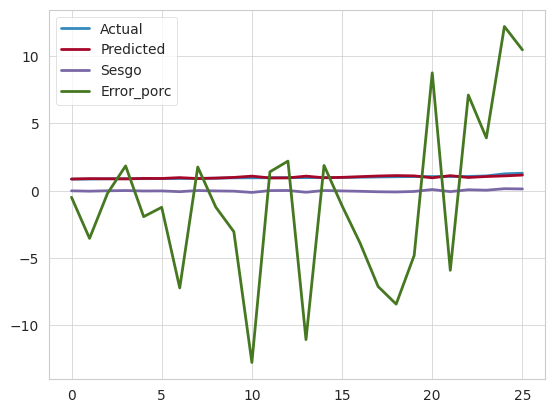

In [ ]:
rating_mean.plot.line()

# Creación de nuevas variables

## Ingeniería de atributos

In [ ]:
AccionesAgrupadas = preciosIndexElecciones

In [ ]:
AccionesAgrupadas.head()

,RPA,Dolar/Peso,SPDR S&P 500,Nasdaq 100,mercadolibre,Globant,DESPEGAR,Ternium,Tenaris,YPF,Pampa Energía,Transportadora de Gas del Sur,Banco Macro,Loma Negra,Bioceres,Cresud
Fecha,,,,,,,,,,,,,,,,
2019-08-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-08-13,1.213014,1.018157,1.015551,1.023953,1.022320,1.018848,0.976649,1.052016,1.010512,1.031818,1.002466,1.087805,1.029834,1.090909,1.045016,1.008117
2019-08-14,1.332877,1.103703,0.985524,0.989692,0.994147,0.972646,0.893077,0.992986,0.956124,0.941818,0.948212,1.067073,0.996685,0.981818,0.993569,0.962662
2019-08-15,1.188356,1.048847,0.988128,0.990683,0.983324,0.977286,0.859484,0.973699,0.951554,0.956364,1.064118,1.159756,1.075138,1.040000,0.990354,1.021104
2019-08-19,1.289726,1.004636,1.014788,1.021244,0.967450,0.885753,0.868497,0.971362,0.995430,0.889091,0.990752,1.070732,0.896133,0.974545,1.053055,0.941559


In [ ]:
AccionesAgrupadas["Tecnologia"] = AccionesAgrupadas[["mercadolibre", "Globant", "DESPEGAR"]].mean(axis=1)
AccionesAgrupadas=AccionesAgrupadas.drop(["mercadolibre", "Globant", "DESPEGAR"],axis=1)
AccionesAgrupadas.head()

,RPA,Dolar/Peso,SPDR S&P 500,Nasdaq 100,Ternium,Tenaris,YPF,Pampa Energía,Transportadora de Gas del Sur,Banco Macro,Loma Negra,Bioceres,Cresud,Tecnologia
Fecha,,,,,,,,,,,,,,
2019-08-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-08-13,1.213014,1.018157,1.015551,1.023953,1.052016,1.010512,1.031818,1.002466,1.087805,1.029834,1.090909,1.045016,1.008117,1.005939
2019-08-14,1.332877,1.103703,0.985524,0.989692,0.992986,0.956124,0.941818,0.948212,1.067073,0.996685,0.981818,0.993569,0.962662,0.953290
2019-08-15,1.188356,1.048847,0.988128,0.990683,0.973699,0.951554,0.956364,1.064118,1.159756,1.075138,1.040000,0.990354,1.021104,0.940031
2019-08-19,1.289726,1.004636,1.014788,1.021244,0.971362,0.995430,0.889091,0.990752,1.070732,0.896133,0.974545,1.053055,0.941559,0.907233


In [ ]:
AccionesAgrupadas["Energia"] = AccionesAgrupadas[["YPF", "Pampa Energía", "Transportadora de Gas del Sur"]].mean(axis=1)
AccionesAgrupadas=AccionesAgrupadas.drop(["YPF", "Pampa Energía", "Transportadora de Gas del Sur"],axis=1)
AccionesAgrupadas.head()

,RPA,Dolar/Peso,SPDR S&P 500,Nasdaq 100,Ternium,Tenaris,Banco Macro,Loma Negra,Bioceres,Cresud,Tecnologia,Energia
Fecha,,,,,,,,,,,,
2019-08-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-08-13,1.213014,1.018157,1.015551,1.023953,1.052016,1.010512,1.029834,1.090909,1.045016,1.008117,1.005939,1.040696
2019-08-14,1.332877,1.103703,0.985524,0.989692,0.992986,0.956124,0.996685,0.981818,0.993569,0.962662,0.953290,0.985701
2019-08-15,1.188356,1.048847,0.988128,0.990683,0.973699,0.951554,1.075138,1.040000,0.990354,1.021104,0.940031,1.060079
2019-08-19,1.289726,1.004636,1.014788,1.021244,0.971362,0.995430,0.896133,0.974545,1.053055,0.941559,0.907233,0.983525


In [ ]:
AccionesAgrupadas["Agro"] = AccionesAgrupadas[[" Bioceres", "Cresud "]].mean(axis=1)
AccionesAgrupadas=AccionesAgrupadas.drop([" Bioceres", "Cresud ", "Banco Macro"],axis=1)
AccionesAgrupadas.head()

,RPA,Dolar/Peso,SPDR S&P 500,Nasdaq 100,Ternium,Tenaris,Loma Negra,Tecnologia,Energia,Agro
Fecha,,,,,,,,,,
2019-08-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-08-13,1.213014,1.018157,1.015551,1.023953,1.052016,1.010512,1.090909,1.005939,1.040696,1.026567
2019-08-14,1.332877,1.103703,0.985524,0.989692,0.992986,0.956124,0.981818,0.953290,0.985701,0.978116
2019-08-15,1.188356,1.048847,0.988128,0.990683,0.973699,0.951554,1.040000,0.940031,1.060079,1.005729
2019-08-19,1.289726,1.004636,1.014788,1.021244,0.971362,0.995430,0.974545,0.907233,0.983525,0.997307


In [ ]:
AccionesAgrupadas["Construccion"] = AccionesAgrupadas[["Ternium", "Tenaris", "Loma Negra"]].mean(axis=1)
AccionesAgrupadas=AccionesAgrupadas.drop(["Ternium", "Tenaris", "Loma Negra"],axis=1)
AccionesAgrupadas.head()

,RPA,Dolar/Peso,SPDR S&P 500,Nasdaq 100,Tecnologia,Energia,Agro,Construccion
Fecha,,,,,,,,
2019-08-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-08-13,1.213014,1.018157,1.015551,1.023953,1.005939,1.040696,1.026567,1.051146
2019-08-14,1.332877,1.103703,0.985524,0.989692,0.953290,0.985701,0.978116,0.976976
2019-08-15,1.188356,1.048847,0.988128,0.990683,0.940031,1.060079,1.005729,0.988418
2019-08-19,1.289726,1.004636,1.014788,1.021244,0.907233,0.983525,0.997307,0.980446


## Regresión lineal múltiple con nuevos atributos

**Predicción de acciones tecnológicas**

In [ ]:
df_train = AccionesAgrupadas[['Dolar/Peso' ,'RPA', 'Nasdaq 100']]
target = AccionesAgrupadas['Tecnologia']
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test) # realizo predicciones

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.03385803085602001
Mean Squared Error: 0.0016645261711961926
Root Mean Squared Error: 0.040798605015321204
R^2: 0.8018220860245043


El valor para R^2 de 0.86 es bueno y muy superior al 0.72 de una acción particular como se calculó para Globant, por ejemplo.

Utilizando el parámetro "SPDR S&P 500" el valor es de 0.76 porque está más relacionado con manufactura y no con tecnología como "Nasdaq".

## Random Forest con variables agrupadas

In [ ]:
df_train = AccionesAgrupadas[['Dolar/Peso' ,'RPA', 'Nasdaq 100']]

target = AccionesAgrupadas['Tecnologia']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2)

In [ ]:
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

rf_model = RandomForestRegressor()

for g in ParameterGrid(grid):
    rf_model.set_params(**g)
    rf_model.fit(X_train, y_train)
    test_scores.append(rf_model.score(X_test, y_test))

best_index = np.argmax(test_scores)
print(test_scores[best_index], ParameterGrid(grid)[best_index])

0.9649909868462225 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features=4, n_estimators=200,
                      random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08414196493464503
Mean Squared Error: 0.010587264535856287
Root Mean Squared Error: 0.10289443394011305


Los índices de error calculados con el modelo Random Forest son mayores que el modelo de Regresión Lineal Múltiple, por lo que seleccionamos este último como el mejor modelo para utilizar.

# Crossvalidation y optimización de hiperparámetros (e.g gridsearch, randomizedsearch, etc.)

In [ ]:
# El dataset a utilizar de ahora en adelante sería "AccionesAgrupadas".

In [ ]:
#

##Regresión lineal múltiple con  Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df_train = AccionesAgrupadas[['Dolar/Peso' ,'RPA', 'Nasdaq 100']]
target = AccionesAgrupadas['Tecnologia']
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2)

In [ ]:
regressor= LinearRegression()
y_pred = cross_val_predict(regressor, df_train , target, cv=10)
scores = cross_val_score(regressor, df_train, target, scoring="neg_mean_squared_error", cv=10)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test) # realizo predicciones

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.02617404837833751
Mean Squared Error: 0.0013400735252734675
Root Mean Squared Error: 0.036607014700374946
R^2: 0.864624819125315


##Analisis Cross validation
###Antes
####Mean Absolute Error: 0.03385803085602001
####Mean Squared Error: 0.0016645261711961926
####Root Mean Squared Error: 0.040798605015321204
####R^2: 0.8018220860245043
###Despues
####Mean Absolute Error: 0.02617404837833751
####Mean Squared Error: 0.0013400735252734675
####Root Mean Squared Error: 0.036607014700374946
####R^2: 0.864624819125315

##Como podemos apreciar luego de aplicar el Croos Validation los resultados mejoran por lo que se puede estimar con una mayor seguridad la tendencia del movimiento al apliar la metologia, ya que los resultados cambian al ser las muestra variables en los diferentes periodos de tiempo




# Hypertuning

In [ ]:
df_train = AccionesAgrupadas[['Dolar/Peso' ,'RPA', 'Nasdaq 100']]

target = AccionesAgrupadas['Tecnologia']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=30, bootstrap=True)

param_grid = dict(n_estimators=[10, 50, 100, 200, 300], max_depth=[5, 10, 30, 40])

    #----repeated---
X = df_train
y = target

grid = GridSearchCV(rfr, param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(X,y)
print(grid.cv_results_)
print("-----------------")

print(-grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

{'mean_fit_time': array([0.07953513, 0.12543247, 0.24830709, 0.25849082, 0.43901453,
       0.02489727, 0.1047133 , 0.14524188, 0.26905692, 0.39772723,
       0.01593025, 0.06815171, 0.20328922, 0.30396426, 0.40148809,
       0.01570754, 0.06895397, 0.13515925, 0.37010145, 0.41999319]), 'std_fit_time': array([0.02414285, 0.01500377, 0.14732917, 0.00440187, 0.09515694,
       0.00103175, 0.01670797, 0.01533315, 0.00394766, 0.00443819,
       0.00222155, 0.00162216, 0.03384195, 0.07063874, 0.01076599,
       0.00092198, 0.00306598, 0.003811  , 0.08143802, 0.01584334]), 'mean_score_time': array([0.01407669, 0.01216323, 0.01624608, 0.01518741, 0.02489691,
       0.00351586, 0.007144  , 0.0096621 , 0.0149261 , 0.02145402,
       0.00246685, 0.00522499, 0.01231699, 0.01637816, 0.02092252,
       0.00271199, 0.00519993, 0.00796943, 0.01895192, 0.02338555]), 'std_score_time': array([5.88707276e-03, 4.68768458e-03, 1.01076489e-02, 3.23067725e-03,
       5.65016694e-03, 8.53782358e-05, 1.2211048

In [ ]:
rfr_GridSearch = RandomForestRegressor(n_estimators=10, criterion='squared_error', max_depth=5, bootstrap=True)
rfr_GridSearch.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
y_pred = rfr_GridSearch.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09989907789773876
Mean Squared Error: 0.014973138176437029
Root Mean Squared Error: 0.12236477506389258


#Analisis Search Grid
###Antes
####Mean Absolute Error: 0.08414196493464503
####Mean Squared Error: 0.010587264535856287
####Root Mean Squared Error: 0.10289443394011305
###Despues
####Mean Absolute Error: 0.09937761046810767
####Mean Squared Error: 0.014629501693305732
####Root Mean Squared Error: 0.12095247700359729

###En este caso los parametros obtenidos en ParameterGrid son mejores que con SearGrid aunque los que propone el SearGrid tiene un menor costo de calcula y un resultado mas que aceptable


#Preguntas y Problema a resolver


####+ ¿Cómo influyen el valor del dólar en pesos y el índice de Riesgo País del JP Morgan en los valores de las acciones? - ¿Hay una relación significativa entre estas variables macroeconómicas y el rendimiento de las acciones?

##R: Como verificamos con la matris de correlacion y los modelos hay acciones que estan relacionadas con el valor del dolar y Riesgo pais por lo que verificamos que las tendecias de estas variables macro economicas sirven para predecir o estimar las tendencia de los valores de las acciones
#
####¿Es posible predecir los valores futuros de las acciones de empresas argentinas utilizando modelos de machine learning y análisis estadístico?
####+¿Qué enfoques de modelado ofrecen la mejor precisión en la predicción?
####¿Cómo se comparan los diferentes modelos predictivos en términos de su capacidad para estimar los valores de las acciones?
#R: como vimos con las metricas del R2 y del MSE tanto para los modelos de Randon Fores como de las regrecion lineal mejorados por los SearchCV y Croos Validation es posible estimar los valores de las acciones como una presicion muy buena
#
####+¿Cuál es el modelo más efectivo y confiable para realizar predicciones en el contexto del mercado de valores argentino?
##R: Ambos modelos usados tanto el de regresion lineal como el radon forest siendo uno de proyeccion geometrica matematica y el otro vasado en arboles de decicion dan muy buenos resultados con variaciones entre los modelos en las milesimas en las metricas normalizadas. por loq ue ambos modelos som muy buenos
####quedaria estudiar en que rango de precio tiene mejor resultado cada modelo
#
####¿Cuál es la utilidad práctica de este modelo predictivo en la toma de decisiones financieras e inversiones?
#R: Se puede conclur que en muchas acciones estan ligadas a los valores del dolar como del Riesgo pais y al ser estos de caractes especulatorios se puede utilizar sus cambio de tendencia para tomar deciciones sobre las acciones ligadas a estas variables
